# EDA and FE on Student dataset

In [91]:
# Import all the libraries
# we use %matplotlib inline it so that all the graphs we can get in jupyter notebook itself rather in another window
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
warnings.filterwarnings('ignore')

In [92]:
# Load the data
data = pd.read_csv("/Users/madhu/Desktop/Data Science/iNeuron/EDA/student_performance dataset/data/student.csv")

In [93]:
# Get top 5 rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
# Get last 5 rows
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [95]:
# shape of data i.e no. of rows and columns. Here rows=1000 and columns = 8.
data.shape

(1000, 8)

In [96]:
# Get data type w.r.t each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [97]:
# data type of a particular feature. 'O' means object.
data['gender'].dtypes

dtype('O')

In [98]:
data['gender'].dtypes == 'O'

True

In [99]:
data['parental level of education'].dtypes

dtype('O')

In [100]:
data['reading score'].dtypes

dtype('int64')

In [101]:
# Get all the column names
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Seggregeate the catogrical and numerical data

In [102]:
# get all the catogrical data using list comprehension.
cat_col = [i for i in data.columns if data[i].dtypes =='O']

In [103]:
# Get all the numerical data using list comprehension.
num_col = [i for i in data.columns if data[i].dtypes != 'O']

In [104]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [105]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [106]:
# memory usages of each columns in bytes
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## Check the missing values

In [107]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [108]:
data.isnull().sum().sum()

0

## Check for the duplocate data

In [109]:
data.duplicated().sum()

0

In [110]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Statistical Analysis of Data

In [111]:
# What are the different catogries inside 'gender' column
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [112]:
# Statistical discription of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [113]:
# correlation between the different features.
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [114]:
# Covariance between different features of dataframe.
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [115]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

Observation:- Data is left skewed

## Different Graphs

### Distplot--> Distribution plot

<AxesSubplot:xlabel='math score', ylabel='Density'>

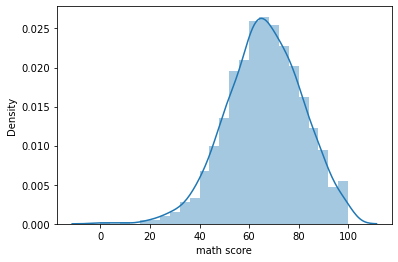

In [116]:
sns.distplot(data['math score'])

### Make a new column called 'average' and store the average of numerical features.

In [117]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [118]:
data['average'] = (data['math score'] + data['reading score'] + data['writing score'])/3

In [119]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Find the mean of numerical data w.r.t gender

In [121]:
data.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


### Find the total count of data w.r.t gender

In [122]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


### question: you have to find out no of student whoever is having less than 30 marks math

In [137]:
data[data['math score'] < 30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [135]:
(data['math score'] < 30).sum()

14

### Check if the math score data is normally distributed


In [141]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average'],
      dtype='object')

In [144]:
data_num = data[num_col]

In [145]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


#### Check w.r.t math score

In [148]:
from scipy.stats import normaltest
normaltest(data_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [159]:
normaltest(data_num['math score'])[1]

0.00045080293869937836

In [151]:
# Now check with the graph


<AxesSubplot:xlabel='math score', ylabel='Density'>

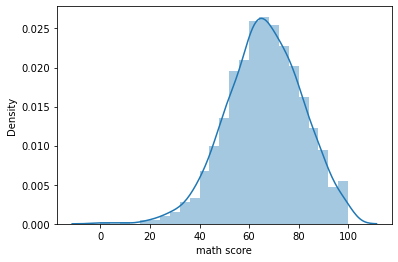

In [152]:
sns.distplot(data_num['math score'])

#### Check w.r.t reading score

In [167]:

normaltest(data_num['reading score'])

NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)

In [161]:
normaltest(data_num['reading score'])[1]

0.003853758403576582

<AxesSubplot:xlabel='reading score', ylabel='Density'>

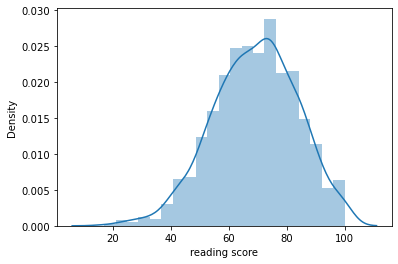

In [158]:
sns.distplot(data_num['reading score'])

#### Check w.r.t writing score

In [163]:
normaltest(data_num['writing score'])[1]

0.0011101885439899974

<AxesSubplot:xlabel='writing score', ylabel='Density'>

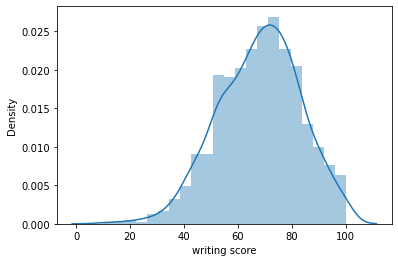

In [165]:
sns.distplot(data_num['writing score'])

## Outliers

### Boxplot 
To check if outlier is there in the data or not. Check the outlier inside all 3 numerical cloumns.


<AxesSubplot:xlabel='math score'>

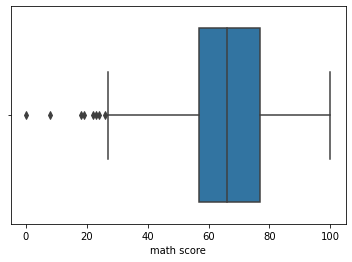

In [169]:
sns.boxplot(data['math score'])

<AxesSubplot:xlabel='reading score'>

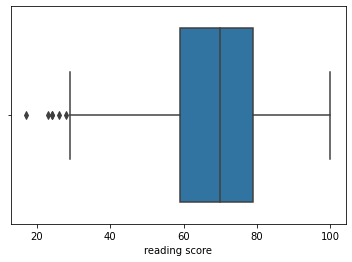

In [170]:
sns.boxplot(data['reading score'])

<AxesSubplot:xlabel='writing score'>

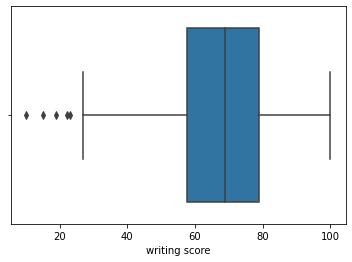

In [171]:
sns.boxplot(data['writing score'])

Observation:- We can see left side i.e negative side we have some outliers inside 'math score' column.

### Find the outliers Value

In [175]:
# Minimum value
data['math score'].min()

0

In [177]:
# Maximum value
data['math score'].max()

100

In [178]:
# 25 percentile
q1 = data['math score'].quantile(0.25)

In [179]:
# 75 percentile
q3 = data['math score'].quantile(0.75)

In [180]:
IQR = q3-q1

In [181]:
lower_limit = q1-(1.5*IQR)

In [182]:
upper_limit = q3+(1.5*IQR)

In [183]:
lower_limit

27.0

In [184]:
upper_limit

107.0

In [189]:
data_outlier_lower = data[data['math score']<lower_limit]

In [190]:
# This is our outlier in 'math score' column.
data_outlier_lower

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [191]:
data_outlier_upper = data[data['math score']>upper_limit]

In [192]:

data_outlier_upper

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


### How to handle outlier?
Suppose we want to drop those outlier

In [196]:
# Drop these indexes from the data_num
data_outlier_lower.index

Int64Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

In [199]:
# After dropping this is the numerical dataset
data_num.drop(data_outlier_lower.index)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


### Write a function to remove outlier

In [201]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])


In [204]:
identifying_treating_outliers(data_num,'math score', 'drop')

In [207]:
data_num['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 992, dtype: int64

## Graph Analysis

### Univariate Analysis

In [210]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


### countplot w.r.t gender


<AxesSubplot:xlabel='gender', ylabel='count'>

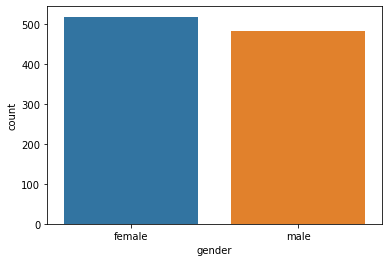

In [211]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

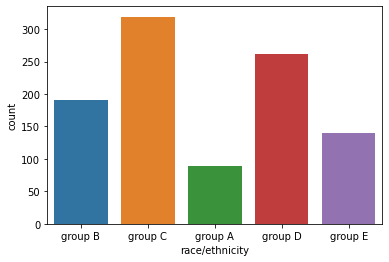

In [213]:
sns.countplot(data['race/ethnicity'])

In [215]:
##Find the mean of numerical data w.r.t gender

In [216]:
df=data.groupby('gender').mean()

In [217]:
df

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [218]:
df['average']

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [219]:
# average marks of all 3 subject of female students
df['average'][0]

69.56949806949807

In [221]:
# average marks of all 3 subject of male students
df['average'][1]

65.8374827109267

In [223]:
#female average Math score
df['math score'][0]

63.633204633204635

In [225]:
# male average Math score
df['math score'][1]

68.72821576763485

### Plot the graph between toatal avg and math avg w.r.t male and female Students

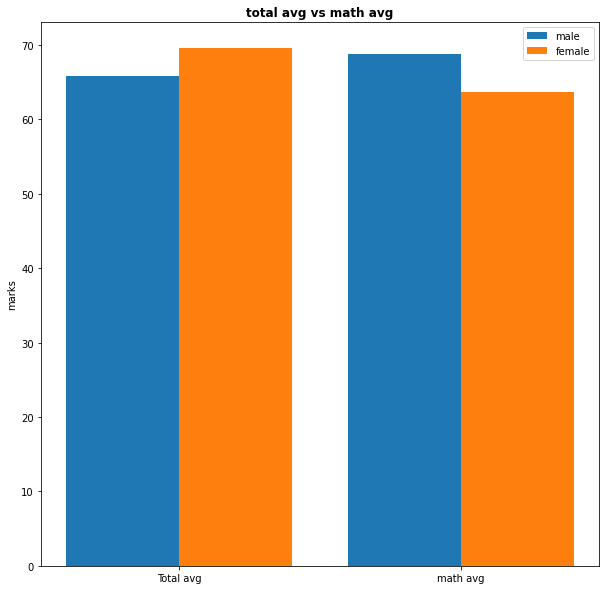

In [227]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['average'][0],df['math score'][0]
male_score=df['average'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

## Heatmap

In [231]:
df.head()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


<AxesSubplot:>

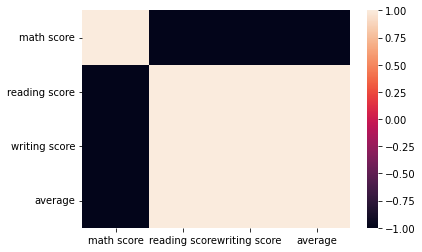

In [232]:
    sns.heatmap(df.corr())

<AxesSubplot:>

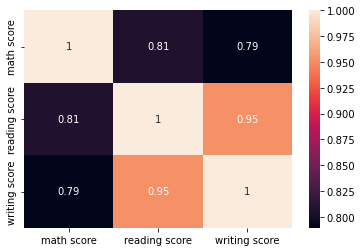

In [235]:
# correlation between numerical features
sns.heatmap(data_num.corr(), annot=True)

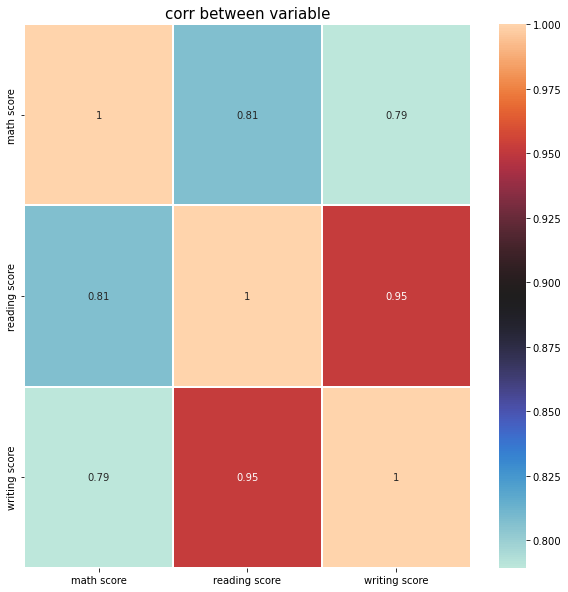

In [236]:
# Correlation b/w all the numerical columns with more beautification
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

## Pairplot


In [240]:
data_num.head()

,math score,reading score,writing score
0,72,72.0,74
1,69,90.0,88
2,90,95.0,93
3,47,57.0,44
4,76,78.0,75


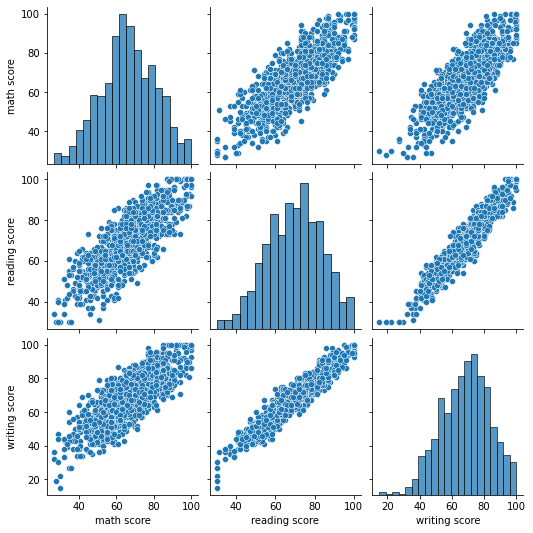

In [238]:
sns.pairplot(data_num)

## Violine plot

<AxesSubplot:>

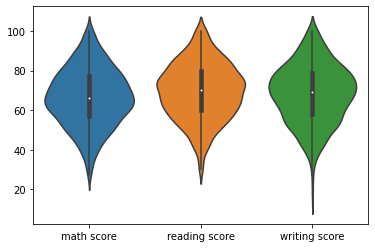

In [244]:
sns.violinplot(data = data_num)